In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sub_utils import load_cat_data, print_mislabeled_images
from utils import input_output_layer_sizes, nn_model, predict, sigmoid, relu, metrics, linear, tanh, leaky_relu, randomly_initialize_parameters

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_cat_data()

y = 1. It's a cat picture.


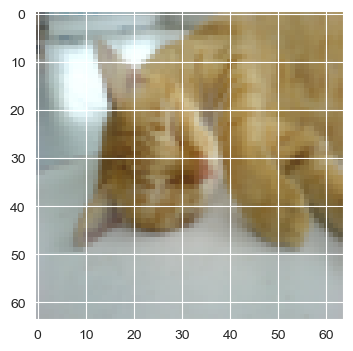

In [3]:
# Example of a picture
index = 121
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

In [5]:

# Shallow neural network 
# [relu: 7] -> [sigmoid: 1]
n_x, n_y = input_output_layer_sizes(train_x, train_y)
layer_dims = [n_x, 7, n_y]
activations = [relu, sigmoid]
parameters = randomly_initialize_parameters(layer_dims)

parameters, costs = nn_model(train_x, train_y, layer_dims, parameters, activations, learning_rate=0.0075, print_cost=True,number_of_iterations=100)

Cost after iteration 0: 0.695046


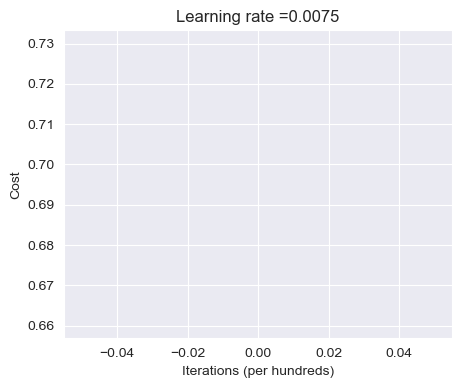

In [6]:
from helper_functions import plot_learning_curve

plot_learning_curve(cost_history=costs, learning_rate=0.0075)

In [7]:
predictions_train = predict(parameters, activations, train_x)
predictions_train

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [8]:
metrics(train_y, predictions_train, len(activations))

Precision for n_h=2: 83.33333333333334 %
Recall for n_h=2: 6.944444444444445 %
Accuracy for n_h=2: 67.46411483253588 %


In [9]:
predictions_test = predict(parameters, activations, test_x)
predictions_test

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False]])

In [10]:
metrics(test_y, predictions_test, len(activations))

Precision for n_h=2: 100.0 %
Recall for n_h=2: 3.0303030303030303 %
Accuracy for n_h=2: 36.0 %


In [11]:

# Deep neural network 
# [relu: 20] -> [relu: 7] -> [relu: 5] -> [sigmoid: 1]
n_x, n_y = input_output_layer_sizes(train_x, train_y)
layer_dims = [n_x, 20, 7, 5, n_y]
activations = [relu, relu, relu, sigmoid]

import pickle

# Read dictionary pkl file

try:
    fp = open('parameters[relu:20]->[relu:7]->[relu:5]->[sigmoid:1].pkl', 'rb')
    parameters = pickle.load(fp)
except IOError:
    parameters = randomly_initialize_parameters(layer_dims)

parameters, costs = nn_model(train_x, train_y, layer_dims, parameters, activations, learning_rate=0.0075, print_cost=True,number_of_iterations=100)

Cost after iteration 0: 0.000467


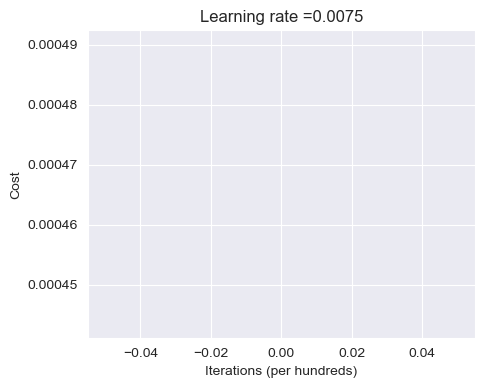

In [12]:
from helper_functions import plot_learning_curve

plot_learning_curve(cost_history=costs, learning_rate=0.0075)

In [13]:
import pickle


# save dictionary to person_data.pkl file
with open('parameters[relu:20]->[relu:7]->[relu:5]->[sigmoid:1].pkl', 'wb') as fp:
    pickle.dump(parameters, fp)
    print('Parameters saved successfully to file')

Parameters saved successfully to file


In [14]:
predictions_train = predict(parameters, activations, train_x)
predictions_train

array([[False, False,  True, False, False, False, False,  True, False,
        False, False,  True, False,  True,  True, False, False, False,
        False,  True, False, False, False, False,  True,  True, False,
         True, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False,  True,  True, False, False,
        False, False,  True, False, False,  True, False, False, False,
         True, False,  True,  True, False,  True,  True,  True, False,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True, False, False, False,  True, False,
        False, False,  True,  True,  True, False, False,  True, False,
        False, False, False,  True, False,  True, False,  True,  True,
         True,  True,  True,  True, False, False, False, False, False,
         True, False, False, False,  True, False, False,  True, False,
      

In [15]:
metrics(train_y, predictions_train, len(activations))

Precision for n_h=4: 100.0 %
Recall for n_h=4: 100.0 %
Accuracy for n_h=4: 100.0 %


In [16]:
predictions_test = predict(parameters, activations, test_x)
predictions_test

array([[ True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True, False,  True, False,  True,
         True, False,  True, False, False,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True, False, False,
        False,  True,  True, False,  True,  True, False, False,  True,
         True, False,  True, False, False]])

In [17]:
metrics(test_y, predictions_test, len(activations))

Precision for n_h=4: 81.81818181818183 %
Recall for n_h=4: 81.81818181818183 %
Accuracy for n_h=4: 76.0 %


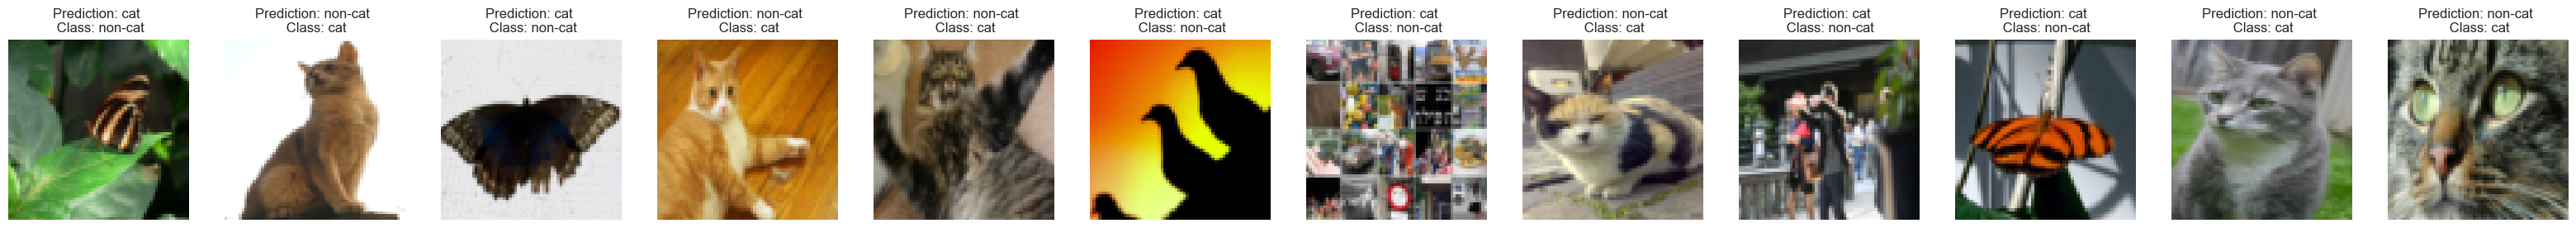

In [61]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)